## Most Steamed Spotify Songs 2023

### Google drive mount

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd ./drive/MyDrive/기계학습특론/mid-project

/content/drive/MyDrive/기계학습특론/mid-project


### Library

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import pearsonr
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

### About Dataset
- Description :
This dataset contains a comprehensive list of the most famous songs of 2023 as listed on Spotify. The dataset offers a wealth of features beyond what is typically available in similar datasets. It provides insights into each song's attributes, popularity, and presence on various music platforms. The dataset includes information such as track name, artist(s) name, release date, Spotify playlists and charts, streaming statistics, Apple Music presence, Deezer presence, Shazam charts, and various audio features.



In [ ]:
data = pd.read_csv('./spotify-2023.csv',encoding='ISO-8859-1')
data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

check data columns

In [ ]:
data.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

nan value check

In [ ]:
nv = data.isna()
print(nv)

     track_name  artist(s)_name  artist_count  released_year  released_month  \
0         False           False         False          False           False   
1         False           False         False          False           False   
2         False           False         False          False           False   
3         False           False         False          False           False   
4         False           False         False          False           False   
..          ...             ...           ...            ...             ...   
948       False           False         False          False           False   
949       False           False         False          False           False   
950       False           False         False          False           False   
951       False           False         False          False           False   
952       False           False         False          False           False   

     released_day  in_spotify_playlists

In [ ]:
missing_values = data.isnull().sum()
print(missing_values)

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64


Missing Values:
1. in_shazam_charts

what is in_shazam_charts?

Shazam charts are rankings of the most Shazamed songs, indicating which tracks users of the Shazam app are identifying the most. Shazam is a popular mobile app that allows users to identify songs by capturing a short audio snippet and matching it against a vast database. The charts give insight into the current music trends and can be a good indicator of popular and emerging songs. These charts can be categorized by region or globally, providing a snapshot of the most searched-for songs at a given time. It's a fun way to discover what music is capturing people's attention around the world.

- The 'in_shazam_charts' value being null may indicate that the song did not make it to the charts or that the artist has not registered in this database.

In [ ]:
# Create a copy for human-readable data
data['shazam_charts_check'] = data['in_shazam_charts']

# Remove commas from the original column and convert to float
data['in_shazam_charts'] = data['in_shazam_charts'].replace({',': ''}, regex=True).astype(float)

# Create another copy for ML processing
data['in_shazam_charts_forML'] = data['in_shazam_charts'].copy()

# Find the max rank
max_rank = data['in_shazam_charts_forML'].max()

# In the 'readable' version, replace NaN with "Not Ranked"
data['shazam_charts_check'].fillna("Not Ranked", inplace=True)

# In the 'forML' version, replace NaN with max_rank + 1
data['in_shazam_charts_forML'].fillna(max_rank + 1, inplace=True)

# Drop the original 'in_shazam_charts' column
data.drop('in_shazam_charts', axis=1, inplace=True)


data['in_shazam_charts_forML'] = data['in_shazam_charts_forML'].astype(int)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   track_name              953 non-null    object
 1   artist(s)_name          953 non-null    object
 2   artist_count            953 non-null    int64 
 3   released_year           953 non-null    int64 
 4   released_month          953 non-null    int64 
 5   released_day            953 non-null    int64 
 6   in_spotify_playlists    953 non-null    int64 
 7   in_spotify_charts       953 non-null    int64 
 8   streams                 953 non-null    object
 9   in_apple_playlists      953 non-null    int64 
 10  in_apple_charts         953 non-null    int64 
 11  in_deezer_playlists     953 non-null    object
 12  in_deezer_charts        953 non-null    int64 
 13  bpm                     953 non-null    int64 
 14  key                     858 non-null    object
 15  mode  

2. Key
- This value signifies the musical key in which the song is composed. Assigning mean, median, or mode might be inappropriate and potentially misleading unless the missing values occur randomly without a discernable pattern.

- My strategy : I believe that since the key of each song is a unique characteristic and varies widely, it is not desirable to fill missing values arbitrarily with measures such as the mean or median.

In [ ]:
# Remove the rows with missing 'key' values
data = data.dropna(subset=['key'])

# Verify if the rows with missing values have been removed
print("Missing values after removal:", data['key'].isnull().sum())

Missing values after removal: 0


Check data type

In [ ]:
print('Check Data Types : ')
print(data.dtypes)

Check Data Types : 
track_name                object
artist(s)_name            object
artist_count               int64
released_year              int64
released_month             int64
released_day               int64
in_spotify_playlists       int64
in_spotify_charts          int64
streams                   object
in_apple_playlists         int64
in_apple_charts            int64
in_deezer_playlists       object
in_deezer_charts           int64
bpm                        int64
key                       object
mode                      object
danceability_%             int64
valence_%                  int64
energy_%                   int64
acousticness_%             int64
instrumentalness_%         int64
liveness_%                 int64
speechiness_%              int64
shazam_charts_check       object
in_shazam_charts_forML     int64
dtype: object


In [ ]:
print(data['released_year'])
print(data['released_month'])
print(data['released_day'])

0      2023
1      2023
2      2023
3      2019
4      2023
       ... 
948    2022
949    2022
950    2022
951    2022
952    2022
Name: released_year, Length: 858, dtype: int64
0       7
1       3
2       6
3       8
4       5
       ..
948    11
949    10
950    11
951    10
952    11
Name: released_month, Length: 858, dtype: int64
0      14
1      23
2      30
3      23
4      18
       ..
948     3
949    21
950     3
951    20
952     4
Name: released_day, Length: 858, dtype: int64


In [ ]:
# Combine 'released_year', 'released_month', and 'released_day' into a single datetime column
data['release_date'] = pd.to_datetime(data['released_year'].astype(str) + '.' +
                                      data['released_month'].astype(str) + '.' +
                                      data['released_day'].astype(str),errors='coerce')

# Check the new 'release_date' column
print(data['release_date'].head())

0   2023-07-14
1   2023-03-23
2   2023-06-30
3   2019-08-23
4   2023-05-18
Name: release_date, dtype: datetime64[ns]


In [ ]:
print(data['streams'])

0      141381703
1      133716286
2      140003974
3      800840817
4      303236322
         ...    
948     91473363
949    121871870
950     73513683
951    133895612
952     96007391
Name: streams, Length: 858, dtype: object


In [ ]:
# Convert 'streams', 'in_deezer_playlists' to appropriate numerical or categorical data types
data['streams'] = pd.to_numeric(data['streams'], errors='coerce')
data['in_deezer_playlists'] = pd.to_numeric(data['in_deezer_playlists'], errors='coerce')

In [ ]:
print('After Data Types:')
print(data.dtypes)

After Data Types:
track_name                        object
artist(s)_name                    object
artist_count                       int64
released_year                      int64
released_month                     int64
released_day                       int64
in_spotify_playlists               int64
in_spotify_charts                  int64
streams                          float64
in_apple_playlists                 int64
in_apple_charts                    int64
in_deezer_playlists              float64
in_deezer_charts                   int64
bpm                                int64
key                               object
mode                              object
danceability_%                     int64
valence_%                          int64
energy_%                           int64
acousticness_%                     int64
instrumentalness_%                 int64
liveness_%                         int64
speechiness_%                      int64
shazam_charts_check               objec

In [ ]:
missing_values = data.isnull().sum()
print(missing_values)

track_name                 0
artist(s)_name             0
artist_count               0
released_year              0
released_month             0
released_day               0
in_spotify_playlists       0
in_spotify_charts          0
streams                    1
in_apple_playlists         0
in_apple_charts            0
in_deezer_playlists       75
in_deezer_charts           0
bpm                        0
key                        0
mode                       0
danceability_%             0
valence_%                  0
energy_%                   0
acousticness_%             0
instrumentalness_%         0
liveness_%                 0
speechiness_%              0
shazam_charts_check        0
in_shazam_charts_forML     0
release_date               0
dtype: int64


In [ ]:
print(data[data['streams'].isna()])


                              track_name     artist(s)_name  artist_count  \
574  Love Grows (Where My Rosemary Goes)  Edison Lighthouse             1   

     released_year  released_month  released_day  in_spotify_playlists  \
574           1970               1             1                  2877   

     in_spotify_charts  streams  in_apple_playlists  ...  danceability_%  \
574                  0      NaN                  16  ...              53   

     valence_%  energy_%  acousticness_% instrumentalness_% liveness_%  \
574         75        69               7                  0         17   

     speechiness_%  shazam_charts_check  in_shazam_charts_forML  release_date  
574              3                    0                       0    1970-01-01  

[1 rows x 26 columns]


In [ ]:
# Remove the row with NaN value in 'streams' column
data = data.dropna(subset=['streams'])

# Verify if the row has been removed
print("Number of missing values in 'streams':", data['streams'].isna().sum())

Number of missing values in 'streams': 0


In [ ]:
print(data[data['in_deezer_playlists'].isna()].head(1))


   track_name         artist(s)_name  artist_count  released_year  \
48    Starboy  The Weeknd, Daft Punk             2           2016   

    released_month  released_day  in_spotify_playlists  in_spotify_charts  \
48               9            21                 29536                 79   

         streams  in_apple_playlists  ...  danceability_%  valence_%  \
48 2565529693.00                 281  ...              68         49   

    energy_%  acousticness_% instrumentalness_% liveness_%  speechiness_%  \
48        59              16                  0         13             28   

    shazam_charts_check  in_shazam_charts_forML  release_date  
48                  140                     140    2016-09-21  

[1 rows x 26 columns]


In [ ]:
data['in_deezer_playlists'].fillna(0, inplace=True)

In [ ]:
print(data.dtypes)

track_name                        object
artist(s)_name                    object
artist_count                       int64
released_year                      int64
released_month                     int64
released_day                       int64
in_spotify_playlists               int64
in_spotify_charts                  int64
streams                          float64
in_apple_playlists                 int64
in_apple_charts                    int64
in_deezer_playlists              float64
in_deezer_charts                   int64
bpm                                int64
key                               object
mode                              object
danceability_%                     int64
valence_%                          int64
energy_%                           int64
acousticness_%                     int64
instrumentalness_%                 int64
liveness_%                         int64
speechiness_%                      int64
shazam_charts_check               object
in_shazam_charts

In [ ]:
mode_onehot = pd.get_dummies(data['mode'],prefix='mode')
print(mode_onehot)

     mode_Major  mode_Minor
0             1           0
1             1           0
2             1           0
3             1           0
4             0           1
..          ...         ...
948           1           0
949           1           0
950           1           0
951           1           0
952           0           1

[857 rows x 2 columns]


In [ ]:
data = pd.concat([data, mode_onehot], axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 857 entries, 0 to 952
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   track_name              857 non-null    object        
 1   artist(s)_name          857 non-null    object        
 2   artist_count            857 non-null    int64         
 3   released_year           857 non-null    int64         
 4   released_month          857 non-null    int64         
 5   released_day            857 non-null    int64         
 6   in_spotify_playlists    857 non-null    int64         
 7   in_spotify_charts       857 non-null    int64         
 8   streams                 857 non-null    float64       
 9   in_apple_playlists      857 non-null    int64         
 10  in_apple_charts         857 non-null    int64         
 11  in_deezer_playlists     857 non-null    float64       
 12  in_deezer_charts        857 non-null    int64     

In [ ]:
label_encoder = LabelEncoder()
data['key_encoded'] = label_encoder.fit_transform(data['key'].astype(str))


print("\nUpdated Data with Encoded Categorical Variables:")
print(data[['mode', *mode_onehot.columns, 'key', 'key_encoded']].head())


Updated Data with Encoded Categorical Variables:
    mode  mode_Major  mode_Minor key  key_encoded
0  Major           1           0   B            2
1  Major           1           0  C#            3
2  Major           1           0   F            7
3  Major           1           0   A            0
4  Minor           0           1   A            0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 857 entries, 0 to 952
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   track_name              857 non-null    object        
 1   artist(s)_name          857 non-null    object        
 2   artist_count            857 non-null    int64         
 3   released_year           857 non-null    int64         
 4   released_month          857 non-null    int64         
 5   released_day            857 non-null    int64         
 6   in_spotify_playlists    857 non-null    int64         
 7   in_spotify_charts       857 non-null    int64         
 8   streams                 857 non-null    float64       
 9   in_apple_playlists      857 non-null    int64         
 10  in_apple_charts         857 non-null    int64         
 11  in_deezer_playlists     857 non-null    float64       
 12  in_deezer_charts        857 non-null    int64     

In [ ]:
percentage_columns = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

# Print min and max values for each percentage column
for col in percentage_columns:
    print(f"{col}: Min = {data[col].min()}, Max = {data[col].max()}")

danceability_%: Min = 23, Max = 96
valence_%: Min = 4, Max = 97
energy_%: Min = 14, Max = 97
acousticness_%: Min = 0, Max = 97
instrumentalness_%: Min = 0, Max = 91
liveness_%: Min = 3, Max = 97
speechiness_%: Min = 2, Max = 64


In [ ]:
for col in percentage_columns:
    data[col+'forML'] = data[col] / 100.

In [ ]:
print(data.dtypes)

track_name                         object
artist(s)_name                     object
artist_count                        int64
released_year                       int64
released_month                      int64
released_day                        int64
in_spotify_playlists                int64
in_spotify_charts                   int64
streams                           float64
in_apple_playlists                  int64
in_apple_charts                     int64
in_deezer_playlists               float64
in_deezer_charts                    int64
bpm                                 int64
key                                object
mode                               object
danceability_%                      int64
valence_%                           int64
energy_%                            int64
acousticness_%                      int64
instrumentalness_%                  int64
liveness_%                          int64
speechiness_%                       int64
shazam_charts_check               

In [ ]:
data.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,...,mode_Major,mode_Minor,key_encoded,danceability_%forML,valence_%forML,energy_%forML,acousticness_%forML,instrumentalness_%forML,liveness_%forML,speechiness_%forML
count,857.00,857.00,857.00,857.00,857.00,857.00,857.00,857.00,857.00,857.00,...,857.00,857.00,857.00,857.00,857.00,857.00,857.00,857.00,857.00,857.00
mean,1.55,2018.30,6.03,13.74,5205.00,11.96,513355357.39,67.38,51.04,96.84,...,0.55,0.45,5.16,0.67,0.51,0.64,0.27,0.02,0.18,0.10
std,0.86,10.99,3.57,9.29,7944.03,19.19,571485476.73,86.56,50.41,169.35,...,0.50,0.50,3.23,0.15,0.24,0.16,0.26,0.09,0.14,0.10
min,1.00,1930.00,1.00,1.00,31.00,0.00,2762.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.23,0.04,0.14,0.00,0.00,0.03,0.02
25%,1.00,2020.00,3.00,5.00,859.00,0.00,139193812.00,13.00,7.00,8.00,...,0.00,0.00,3.00,0.57,0.32,0.53,0.05,0.00,0.10,0.04
50%,1.00,2022.00,5.00,13.00,2226.00,3.00,284908316.00,34.00,38.00,30.00,...,1.00,0.00,5.00,0.70,0.51,0.66,0.17,0.00,0.12,0.06
75%,2.00,2022.00,9.00,22.00,5542.00,16.00,674072710.00,85.00,85.00,99.00,...,1.00,1.00,8.00,0.78,0.70,0.76,0.42,0.00,0.24,0.12
max,8.00,2023.00,12.00,31.00,52898.00,147.00,3703895074.00,672.00,275.00,965.00,...,1.00,1.00,10.00,0.96,0.97,0.97,0.97,0.91,0.97,0.64


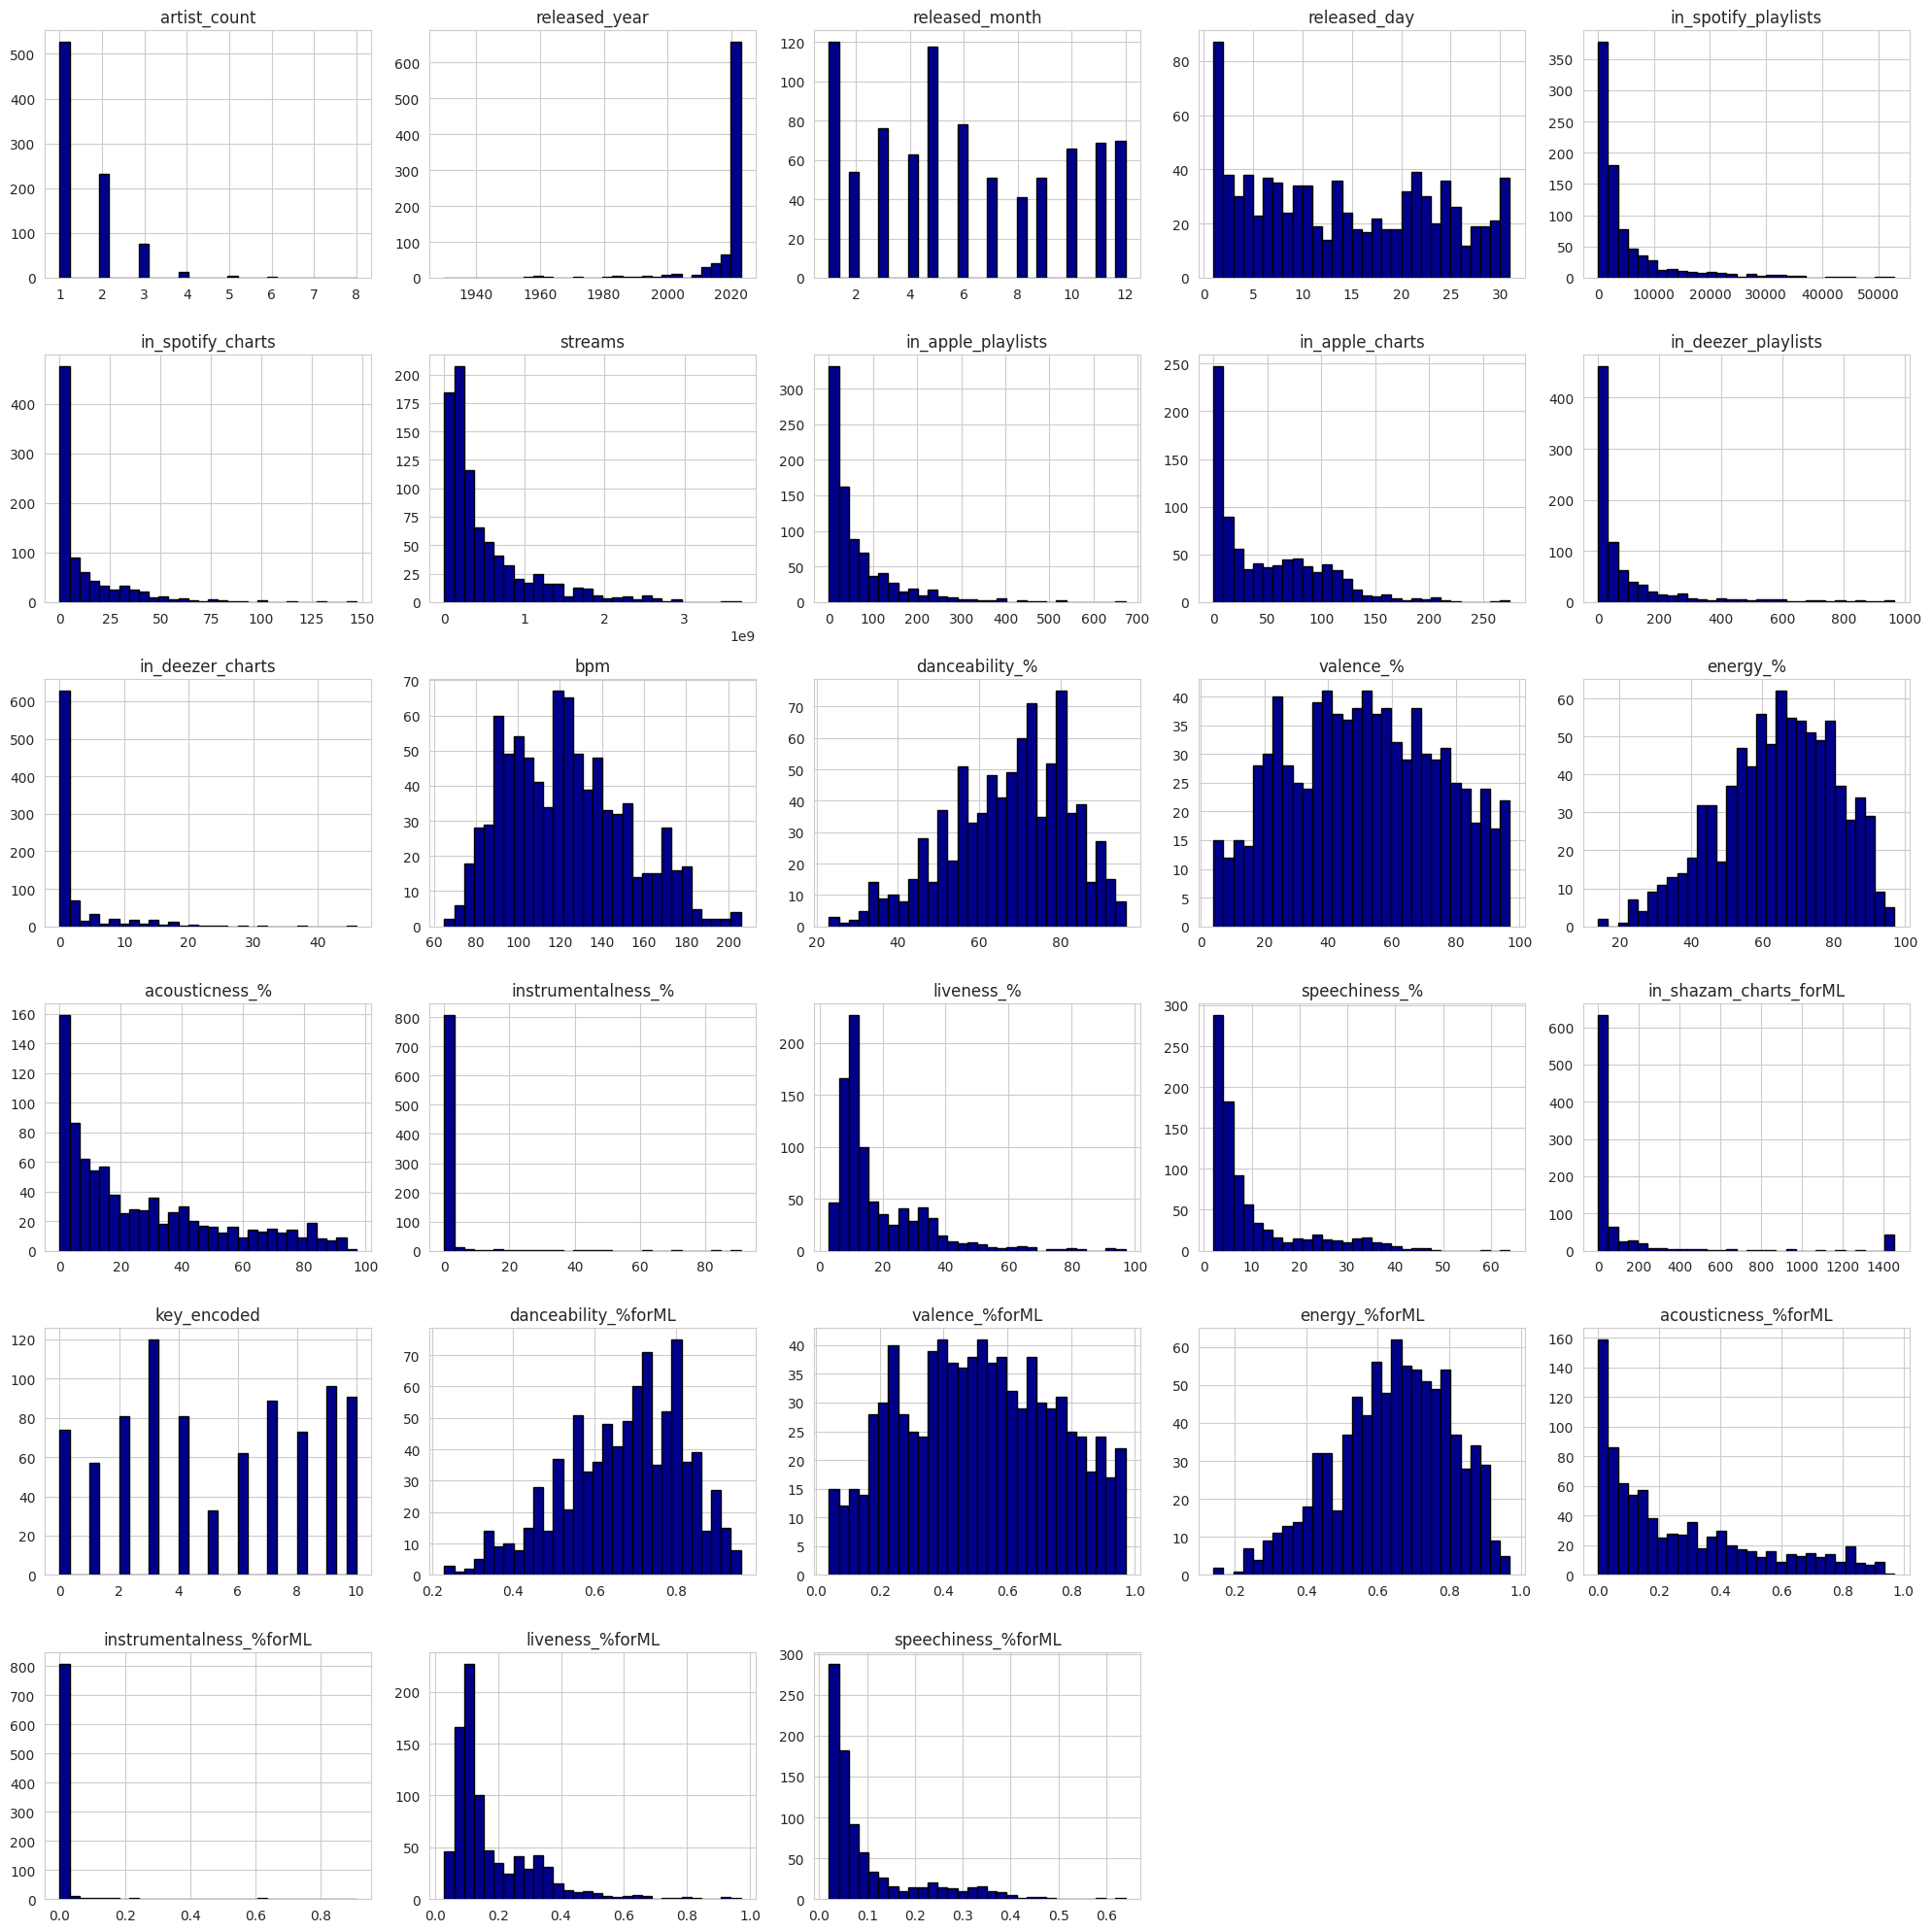

In [ ]:
sns.set_style("whitegrid")

# Plotting histograms for all numerical columns
data.select_dtypes(include=['float64', 'int64']).hist(bins=30, figsize=(20,20), color='darkblue', edgecolor='black')
plt.tight_layout()
plt.show()

features's observations:

**artist_count** : Most songs are performed by a single artist, but there's a noticeable number of songs with multiple artists as well.

**released_year** : Most songs were released in the 2020s.

**released_month** : January (1) and May (5) appear to be particularly popular months for song releases. This could be due to various reasons such as industry practices or seasonal trends.

**released_day** : There's a slight peak around the start and middle of the month, but overall, song releases are relatively distributed throughout the month.

**in_playlists and in_charts** : Most songs are either not present or only appear in a few playlists or charts. However, there's a small subset of songs that seem to dominate in terms of being added to many playlists or making it to the charts.

**BPM** : Songs range widely in bpm, but there's a prominent peak around 80-100 bpm, indicating that a moderate tempo is quite popular.(https://namu.wiki/w/BPM)


Feature Correlations

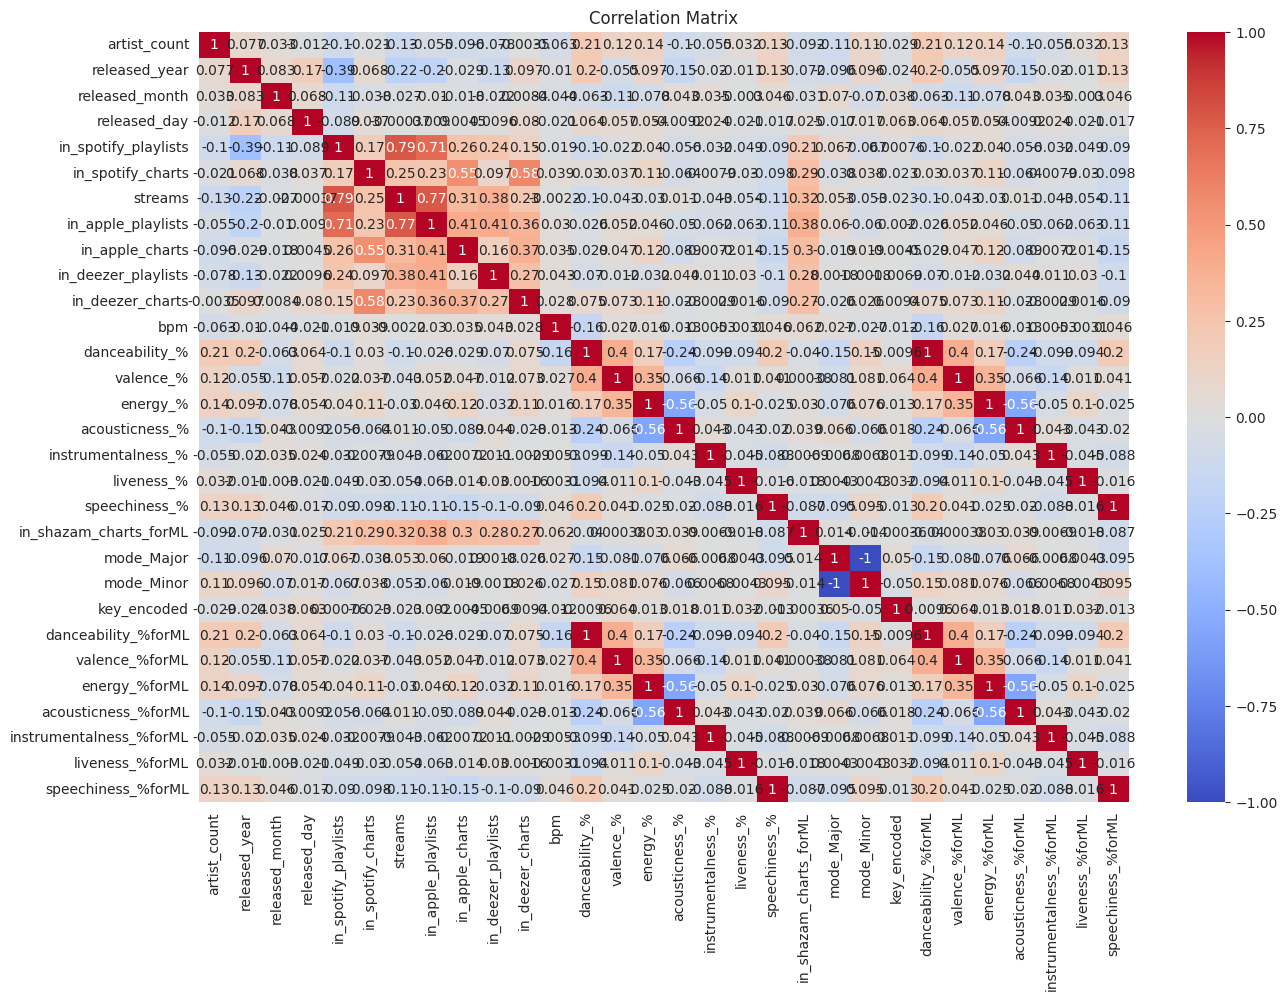

In [ ]:
numeric_data = data.select_dtypes(include=[np.number])

correlation_matrix = numeric_data.corr()


# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

Let's chekc High Correlated Values 🇰

**It is for Positive Correlation**
- 0.1 or less: Very weak correlation
- 0.1 to 0.3: Weak correlation
- 0.3 to 0.5: Moderate correlation
- 0.5 to 0.7: Strong correlation
- 0.7 or more: Very strong correlation

**Analysis**

***Highly Positive Correlations***
- danceability% and valence% are positively correlated : This suggests that tracks with high danceability often have high valence, meaning they are typically more upbeat or cheerful.
- energy& and valence% show positive correlatio : more energy tracks are likely to be more positive

***Platform Consistency***
- in_spotify_playlists, in_apple_playlists, in_deezer_playlists are moderately correlated, indicating that popular on one platform is also widely popular on other platforms.

***Playsists vs. Charts***
- Just because a song is frequently included in playlists doesn't necessarily make it popular. The reverse is also true.

***BPM***
- Contrary to expectations, BPM features are uniquely not strongly correlated with other features


### ML Model

In [ ]:
!pip install lazypredict

In [ ]:
from lazypredict.Supervised import LazyRegressor,LazyClassifier

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 857 entries, 0 to 952
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   track_name               857 non-null    object        
 1   artist(s)_name           857 non-null    object        
 2   artist_count             857 non-null    int64         
 3   released_year            857 non-null    int64         
 4   released_month           857 non-null    int64         
 5   released_day             857 non-null    int64         
 6   in_spotify_playlists     857 non-null    int64         
 7   in_spotify_charts        857 non-null    int64         
 8   streams                  857 non-null    float64       
 9   in_apple_playlists       857 non-null    int64         
 10  in_apple_charts          857 non-null    int64         
 11  in_deezer_playlists      857 non-null    float64       
 12  in_deezer_charts         857 non-nul

In [ ]:
cols_for_BPM = ['artist_count', 'released_year', 'released_month', 'released_day',
    'in_spotify_charts', 'in_spotify_playlists', 'in_apple_playlists', 'in_apple_charts',
    'in_deezer_playlists', 'in_deezer_charts', 'key_encoded', 'danceability_%forML',
    'valence_%forML', 'energy_%forML', 'acousticness_%forML', 'instrumentalness_%forML',
    'liveness_%forML', 'speechiness_%forML', 'streams']
cols_for_STREAM = ['artist_count', 'released_year', 'released_month', 'released_day',
    'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts',
    'in_deezer_playlists', 'in_deezer_charts', 'bpm', 'danceability_%forML',
    'valence_%forML', 'energy_%forML', 'acousticness_%forML', 'instrumentalness_%forML',
    'liveness_%forML', 'speechiness_%forML', 'key_encoded']

In [ ]:
data['streams']

0     141381703.00
1     133716286.00
2     140003974.00
3     800840817.00
4     303236322.00
          ...     
948    91473363.00
949   121871870.00
950    73513683.00
951   133895612.00
952    96007391.00
Name: streams, Length: 857, dtype: float64

In [ ]:
data['bpm']

0      125
1       92
2      138
3      170
4      144
      ... 
948    144
949    166
950     92
951     97
952     90
Name: bpm, Length: 857, dtype: int64

In [ ]:
x_BPM = data[cols_for_BPM]
y_BPM = data['bpm']
# x_train,x_temp,y_train,y_temp = train_test_split(x_BPM,y_BPM,test_size=0.2,random_state=42)
# x_val,x_test,y_val,y_test = train_test_split(x_temp,y_temp,test_size=0.5,random_state=42)


x_STREAM = data[cols_for_STREAM]
y_STREAM = data['streams']
x_train,x_temp,y_train,y_temp = train_test_split(x_STREAM,y_STREAM,test_size=0.2,random_state=42)
x_val,x_test,y_val,y_test = train_test_split(x_temp,y_temp,test_size=0.5,random_state=42)
# Use LazyRegressor to find the best regression model
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
# cls = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = reg.fit(x_train, x_val, y_train, y_val)
# models, predictions = cls.fit(x_train, x_val, y_train, y_val)
# Print the list of models and their performance
print(models)

100%|██████████| 42/42 [00:05<00:00,  8.27it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000183 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1241
[LightGBM] [Info] Number of data points in the train set: 685, number of used features: 19
[LightGBM] [Info] Start training from score 492498505.483212
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [ ]:
predictions.head()

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.77,0.82,269042211.66,0.53
HistGradientBoostingRegressor,0.76,0.81,276815169.02,0.28
RandomForestRegressor,0.75,0.81,283245204.77,0.59
GradientBoostingRegressor,0.74,0.80,286265242.86,0.32
LGBMRegressor,0.74,0.80,287937907.70,0.11


In [ ]:
models.loc[models['RMSE'] == models['RMSE'].min()].index[0]

'ExtraTreesRegressor'

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
# from sklearn.linear_model import RANSACRegressor
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

etr = ExtraTreesRegressor(n_estimators=1000,random_state=42).fit(x_train,y_train)
# rsr = RANSACRegressor(max_trials=500,random_state=42).fit(x_train,y_train)
# y_pred = etr.predict(x_val)
y_pred = etr.predict(x_val)

mse = mean_squared_error(y_val,y_pred)
mae = mean_absolute_error(y_val,y_pred)
r2 = r2_score(y_val,y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R^2 Score: {r2}")
print(etr.get_params())

Mean Squared Error (MSE): 7.724223355269472e+16
Mean Absolute Error (MAE): 182054266.98200002
R^2 Score: 0.8130877727893092
{'bootstrap': False, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1000, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [ ]:
y_test_pred = etr.predict(x_test)

mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Test Set Evaluation:")
print(f"Mean Squared Error (MSE): {mse_test}")
print(f"Mean Absolute Error (MAE): {mae_test}")
print(f"R^2 Score: {r2_test}")


Test Set Evaluation:
Mean Squared Error (MSE): 5.6203676090627016e+16
Mean Absolute Error (MAE): 129121278.64519769
R^2 Score: 0.8873585149218725


In [ ]:
# Retrive feature importance from the random forest model(To see which ones are important)
feature_importances = etr.feature_importances_
features_df = pd.DataFrame({
    'Feature': cols_for_STREAM,
    'Importance': feature_importances
})

print("Feature Importances:")
print(features_df.sort_values(by='Importance', ascending=False))

Feature Importances:
                    Feature  Importance
4      in_spotify_playlists        0.48
6        in_apple_playlists        0.22
1             released_year        0.06
8       in_deezer_playlists        0.06
5         in_spotify_charts        0.02
3              released_day        0.02
9          in_deezer_charts        0.01
2            released_month        0.01
7           in_apple_charts        0.01
14      acousticness_%forML        0.01
12           valence_%forML        0.01
13            energy_%forML        0.01
11      danceability_%forML        0.01
10                      bpm        0.01
18              key_encoded        0.01
16          liveness_%forML        0.01
17       speechiness_%forML        0.01
0              artist_count        0.01
15  instrumentalness_%forML        0.00


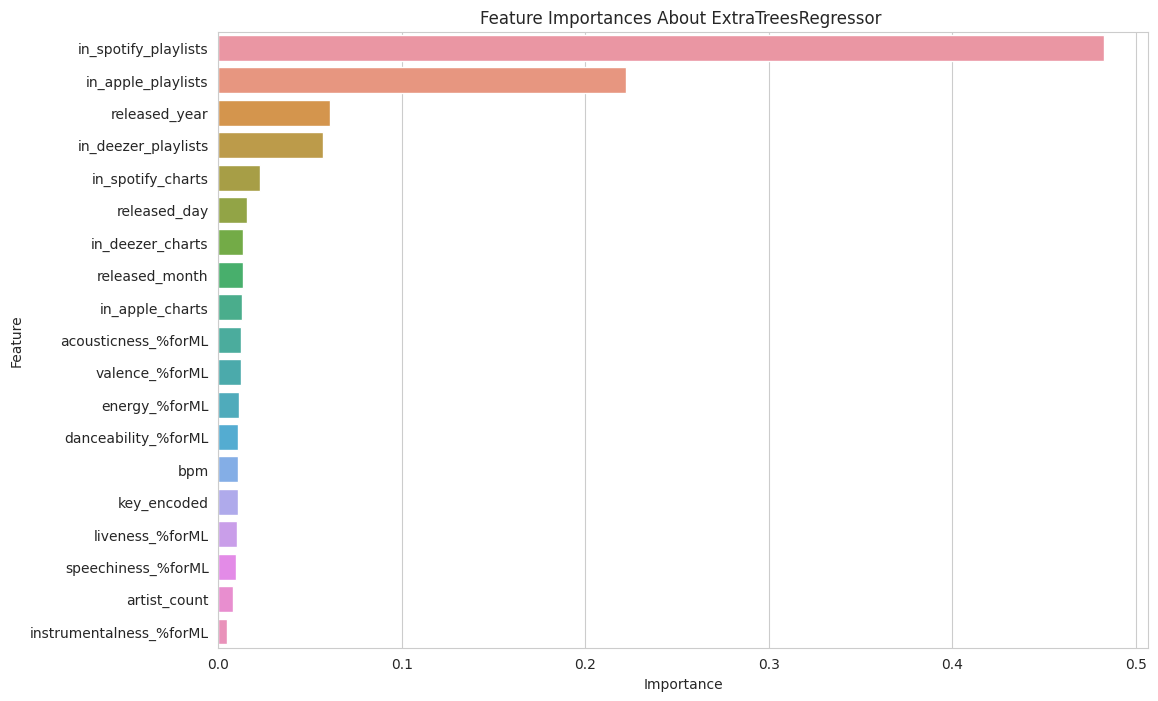

In [ ]:
# Extract feature importances from the trained EXtraTreeRegressor
feature_importances = etr.feature_importances_
features = cols_for_STREAM

# Create a DataFrame for the importances and plot
df_importances = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
df_importances = df_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=df_importances)
plt.title('Feature Importances About ExtraTreesRegressor ')
plt.show()

In [ ]:
param_grid = {
    'n_estimators': [100, 200,500,1000],
    'max_features': ['sqrt','log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
grid_search = GridSearchCV(estimator=ExtraTreesRegressor(), param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='r2')

# Fit the model
grid_search.fit(x_train, y_train)

# Print the best parameters
print("Best parameters:", grid_search.best_params_)

# Predict using the best model
y_val_pred_grid = grid_search.best_estimator_.predict(x_val)

# Evaluate the model's performance
mse = mean_squared_error(y_val, y_val_pred_grid)
mae = mean_absolute_error(y_val, y_val_pred_grid)
r2 = r2_score(y_val, y_val_pred_grid)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R^2 Score: {r2}")

Fitting 3 folds for each of 288 candidates, totalling 864 fits
Best parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Mean Squared Error (MSE): 9.787307991391632e+16
Mean Absolute Error (MAE): 207022864.56627902
R^2 Score: 0.763164858015142


### Evaluation

In [ ]:
# Predict using the best model on the test set
y_test_pred_grid = grid_search.best_estimator_.predict(x_test)

# Evaluate the model's performance on the test set
mse_test_grid = mean_squared_error(y_test, y_test_pred_grid)
mae_test_grid = mean_absolute_error(y_test, y_test_pred_grid)
r2_test_grid = r2_score(y_test, y_test_pred_grid)

print(f"Test Set Evaluation:")
print(f"Mean Squared Error (MSE): {mse_test_grid}")
print(f"Mean Absolute Error (MAE): {mae_test_grid}")
print(f"R^2 Score: {r2_test}")

Test Set Evaluation:
Mean Squared Error (MSE): 8.626529968257165e+16
Mean Absolute Error (MAE): 167164108.7422558
R^2 Score: 0.8852950051626705


In [ ]:

feature_importances = grid_search.best_estimator_.feature_importances_
features_df = pd.DataFrame({
    'Feature': cols_for_STREAM,
    'Importance': feature_importances
})

print("Feature Importances:")
print(features_df.sort_values(by='Importance', ascending=False))

Feature Importances:
                    Feature  Importance
4      in_spotify_playlists        0.31
6        in_apple_playlists        0.21
8       in_deezer_playlists        0.10
1             released_year        0.08
5         in_spotify_charts        0.04
7           in_apple_charts        0.03
9          in_deezer_charts        0.03
2            released_month        0.02
3              released_day        0.02
14      acousticness_%forML        0.02
12           valence_%forML        0.02
17       speechiness_%forML        0.02
11      danceability_%forML        0.02
13            energy_%forML        0.02
10                      bpm        0.02
18              key_encoded        0.02
16          liveness_%forML        0.01
0              artist_count        0.01
15  instrumentalness_%forML        0.01


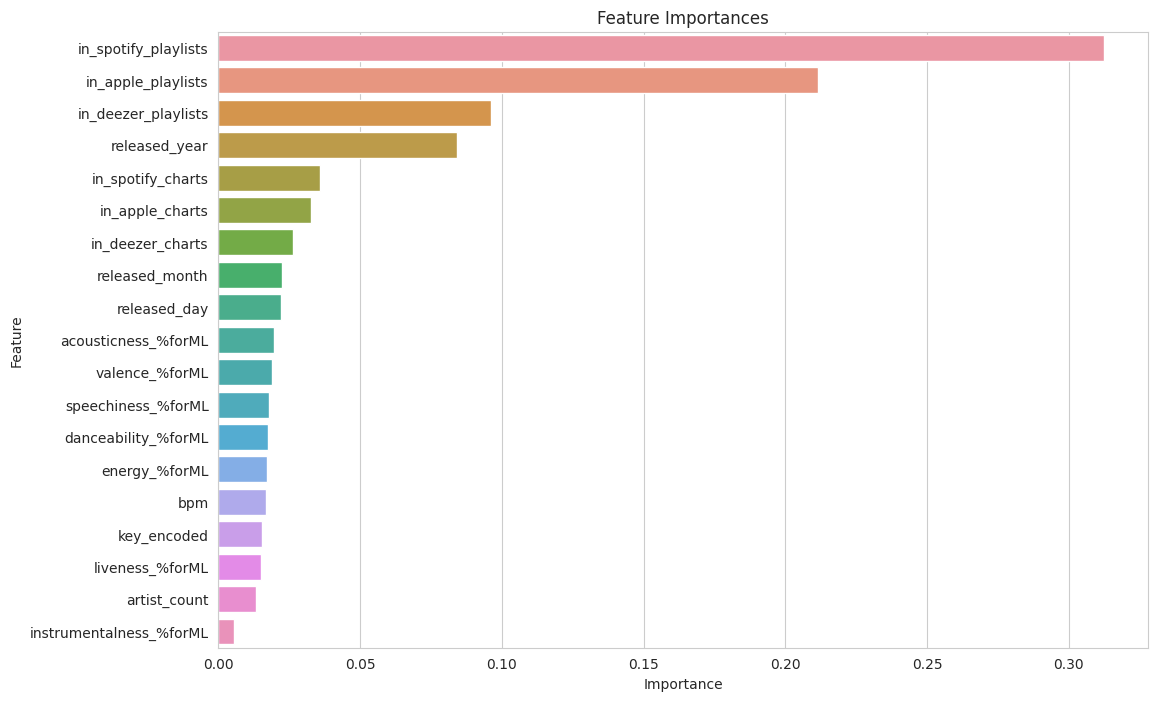

In [ ]:
# Extract feature importances from the trained ExtraTreeRegressor
importances = grid_search.best_estimator_.feature_importances_
features = cols_for_STREAM

# Create a DataFrame for the importances and plot
df_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
df_importances = df_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=df_importances)
plt.title('Feature Importances')
plt.show()

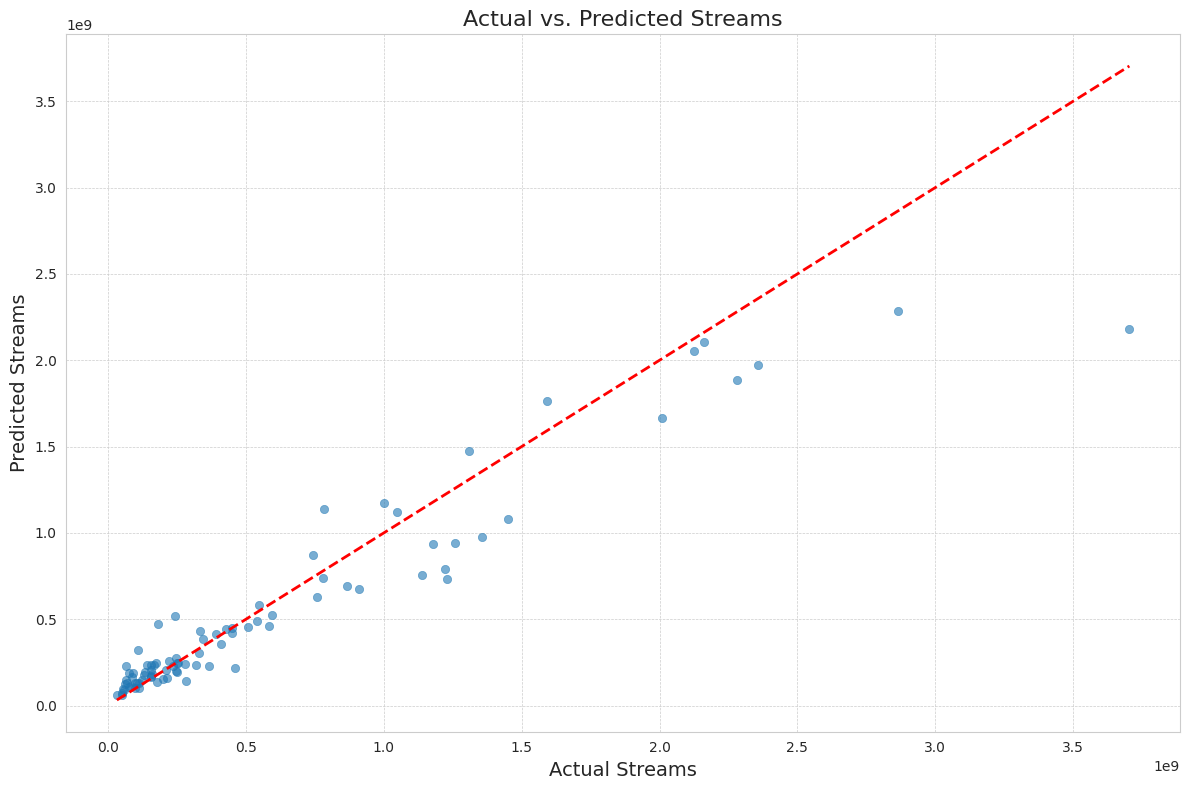

In [ ]:
# Actual vs. Predicted Streams
plt.figure(figsize=(12, 8))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.6, edgecolor=None)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)
plt.xlabel('Actual Streams', fontsize=14)
plt.ylabel('Predicted Streams', fontsize=14)
plt.title('Actual vs. Predicted Streams', fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

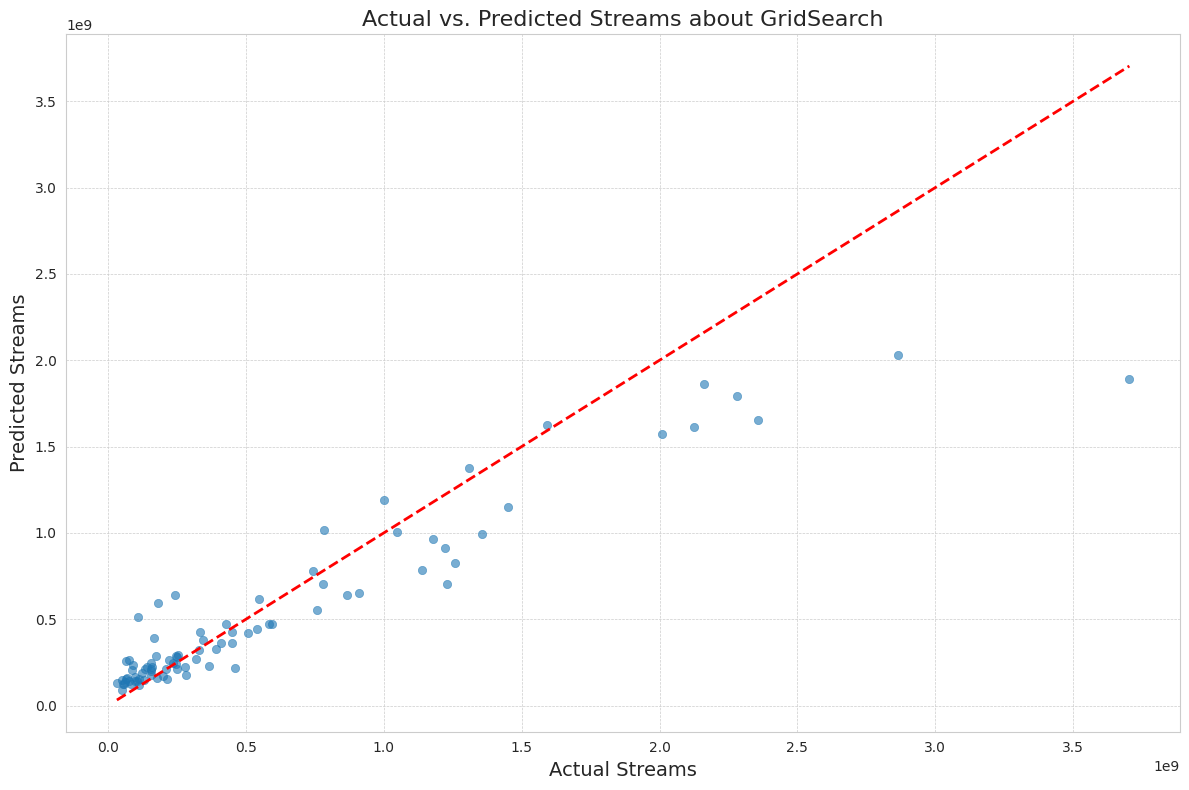

In [ ]:
# Actual vs. Predicted Streams
plt.figure(figsize=(12, 8))
sns.scatterplot(x=y_test, y=y_test_pred_grid, alpha=0.6, edgecolor=None)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)
plt.xlabel('Actual Streams', fontsize=14)
plt.ylabel('Predicted Streams', fontsize=14)
plt.title('Actual vs. Predicted Streams about GridSearch', fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

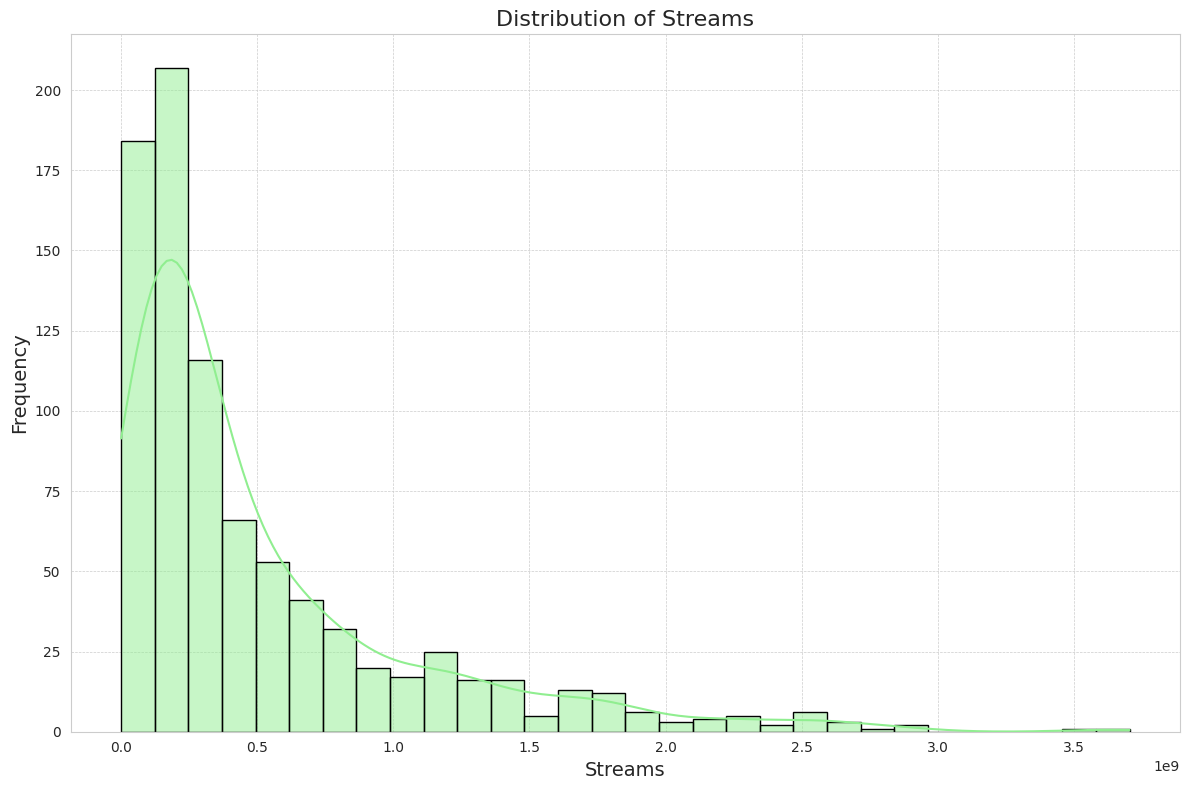

In [ ]:
plt.figure(figsize=(12, 8))
sns.histplot(data['streams'], kde=True, color='lightgreen', edgecolor='black', bins=30)
plt.title('Distribution of Streams', fontsize=16)
plt.xlabel('Streams', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()